<a href="https://colab.research.google.com/github/Momentum1ab/MomentumLAB/blob/main/RRG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


2024-07-03 10:41:33.385 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-07-03 10:41:33.406 No runtime found, using MemoryCacheStorageManager
2024-07-03 10:41:33.412 No runtime found, using MemoryCacheStorageManager
[*********************100%%**********************]  8 of 8 completed


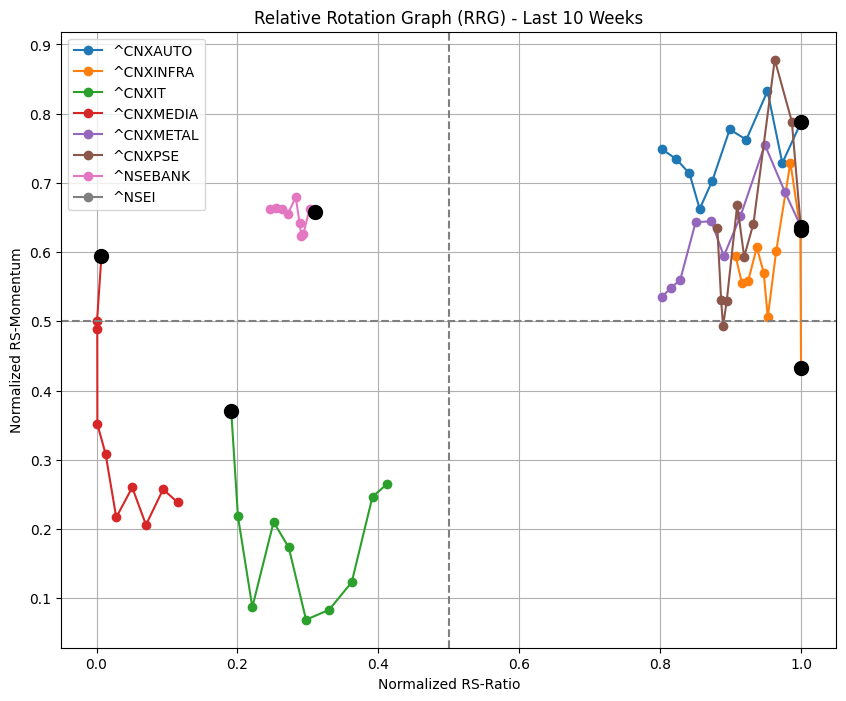

In [3]:
import streamlit as st
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Streamlit app title
st.title('Relative Rotation Graph (RRG) Chart')

# Define tickers
tickers = ['^CNXAUTO', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^NSEBANK','^CNXMEDIA','^NSEBANK','^CNXINFRA', '^NSEI']

# Date range selection
start_date = st.date_input('Start Date', value=pd.to_datetime('2020-01-01'))
end_date = st.date_input('End Date', value=pd.to_datetime('2024-06-06'))

# Number of weeks to display
num_weeks = st.slider('Number of weeks to display', min_value=5, max_value=52, value=10)

# Download data
@st.cache_data
def load_data(tickers, start, end):
    return yf.download(tickers, start=start, end=end, interval='1wk')['Adj Close']

data = load_data(tickers, start_date, end_date)

# Calculate Relative Strength (RS) and Momentum
benchmark = data['^NSEI']
rs = data.divide(benchmark, axis=0)

# Calculate RS-Ratio and RS-Momentum
rs_ratio = rs.rolling(window=10).mean()
rs_momentum = rs_ratio.pct_change() * 100

# Filter for the last n weeks
last_n_weeks = rs_ratio.index[-num_weeks:]

# Normalize RS-Ratio for better spread
rs_ratio_normalized = rs_ratio.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
rs_momentum_normalized = rs_momentum.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Plot RRG
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data points for each ticker
for ticker in rs.columns:
    ax.plot(rs_ratio_normalized.loc[last_n_weeks, ticker],
            rs_momentum_normalized.loc[last_n_weeks, ticker],
            label=ticker, marker='o')

    # Highlight the latest data point in black
    latest_rs_ratio = rs_ratio_normalized.loc[last_n_weeks, ticker].iloc[-1]
    latest_rs_momentum = rs_momentum_normalized.loc[last_n_weeks, ticker].iloc[-1]
    ax.scatter(latest_rs_ratio, latest_rs_momentum, color='black', s=100, zorder=5)

# Draw axes
ax.axvline(x=0.5, color='gray', linestyle='--')
ax.axhline(y=0.5, color='gray', linestyle='--')

ax.set_xlabel('Normalized RS-Ratio')
ax.set_ylabel('Normalized RS-Momentum')
ax.set_title(f'Relative Rotation Graph (RRG) - Last {num_weeks} Weeks')
ax.legend()
ax.grid(True)

# Display the plot in Streamlit
st.pyplot(fig)

# Display raw data
if st.checkbox('Show raw data'):
    st.subheader('Raw data')
    st.write(data)